In [25]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [26]:
g = 9.81 
dt = 0.01 
rho=1.225 
s=1.0 
cd=0.05 
m=85.0 

#下面先来单独考察两个过程的运动情况,设定考察高度10000m，时长50s
init_z = State(y=10000.0 , v=0.0 )

t_0 = 0

t_end = 50 

system_z = System(init=init_z,t_0=t_0, g=g, t_end=t_end, dt=dt)

,values
init,y 10000.0 v 0.0 dtype: float64
t_0,0
g,9.81
t_end,50
dt,0.01


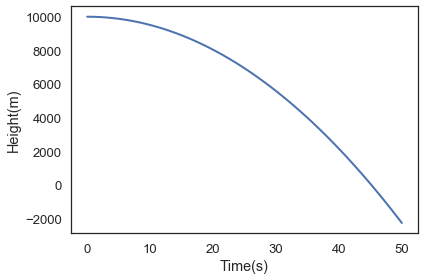

In [27]:
#未开伞的自由落体阶段，设定考察高度10000m，时长50s

def slope_func_z1(state, t, system):
    y, v = state
    
    dydt = v
    dvdt = -system.g
    
    return dydt, dvdt

Vz, Az = slope_func_z1(system_z.init, 0, system_z)

results_z1, details_z1 = run_euler(system_z, slope_func_z1)

plot(results_z1.y)
decorate(xlabel='Time(s)',
         ylabel='Height(m)')


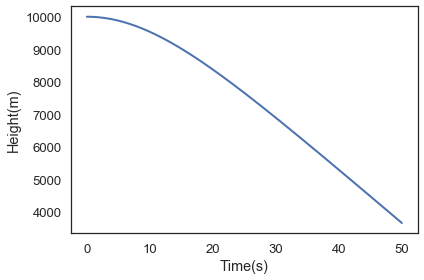

In [28]:
#开伞后的变加速运动,设定考察高度10000m，时长50s

def slope_func_z2(state, t, system):
    y, v= state
    
    dydt = v
    dvdt=(1/2)*rho*v*v*s*cd/m-g
    
    return dydt, dvdt

Vz, Az = slope_func_z2(system_z.init, 0, system_z)

results_z2, details_z2 = run_euler(system_z, slope_func_z2)
plot(results_z2.y)
decorate(xlabel='Time(s)',
         ylabel='Height(m)')


In [29]:
#下面将两个运动过程结合起来分析，自由落体运动10s
def slope_func_z1(state, t, system):
    y, v= state
    dydt=v+ g*dt
    y=y-0.5*(dydt+v)*dt
    return State(v=dydt,y=y)


def slope_func_z2(state, t, system):
    y, v= state
    dvdt=(1/2)*rho*v*v*s*cd/m-g
    if dvdt<0:
        dydt = v+(-(1/2)*rho*v*v*s*cd/m+g)*dt
        y=y-0.5*(dydt+v)*dt
    else:
            dydt=v
            y=y-0.5*(dydt+v)*dt
    
    return State(v=dydt,y=y)



def run_simulation(system,slope_func_z1,slope_func_z2):
    """Runs a simulation of the system.
    
    Add a TimeFrame to the System: results
    
    system: System object
    
    update_func: function that updates state
    """
    init = system.init
    t_0, t_end, dt = system.t_0, system.t_end, system.dt
    
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    ts= linrange(t_0, t_end, dt)
    for t in ts:
        if t<10:
            frame.row[t+dt] = slope_func_z1(frame.row[t], t, system)
        else:
            frame.row[t+dt] = slope_func_z2(frame.row[t], t, system)
    
    return frame

In [30]:
results = run_simulation(system_z , slope_func_z1 , slope_func_z2)

,y,v
0.00,10000.000000,0.000000
0.01,9999.999509,0.098100
0.02,9999.998038,0.196200
0.03,9999.995585,0.294300
0.04,9999.992152,0.392400
...,...,...
49.96,3537.904870,164.287167
49.97,3536.261994,164.288022
49.98,3534.619109,164.288877
49.99,3532.976216,164.289731


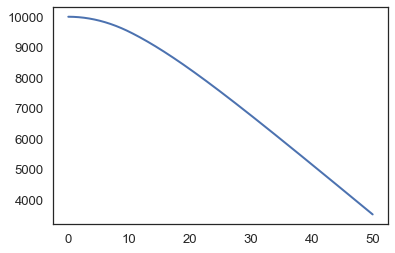

In [31]:
plot(results.y)

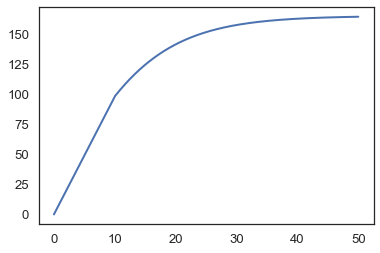

In [32]:
plot(results.v)